In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Load dataset
df = pd.read_csv('/content/ipc_sections.csv')


In [ ]:
df.head(10)

,Description,Offense,Punishment,Section
0,Description of IPC Section 140\nAccording to s...,Wearing the dress or carrying any token used b...,3 Months or Fine or Both,IPC_140
1,Description of IPC Section 127\nAccording to s...,Receiving property taken by war or depredation...,7 Years + Fine + forfeiture of property,IPC_127
2,Description of IPC Section 128\nAccording to s...,Public servant voluntarily allowing prisoner o...,Imprisonment for Life or 10 Years + Fine,IPC_128
3,Description of IPC Section 129\nAccording to s...,Public servant negligently suffering prisoner ...,Simple Imprisonment 3 Years + Fine,IPC_129
4,Description of IPC Section 130\nAccording to s...,"Aiding escape of, rescuing or harbouring, such...",Imprisonment for Life or 10 Years + Fine,IPC_130
5,Description of IPC Section 131\nAccording to s...,"Abetting mutiny, or attempting to seduce an of...",Imprisonment for Life or 10 Years + Fine,IPC_131
6,Description of IPC Section 132\nAccording to s...,"Abetment of mutiny, if mutiny is committed in ...",Death or Imprisonment for Life or 10 Years + Fine,IPC_132
7,Description of IPC Section 133\nAccording to s...,"Abetment of an assault by An officer, soldier,...",3 Years + Fine,IPC_133
8,Description of IPC Section 134\nAccording to s...,"Abetment of such assault, if the assault is co...",7 Years + Fine,IPC_134
9,Description of IPC Section 135\nAccording to s...,"Abetment of the desertion of an officer, soldi...",2 Years or Fine or Both,IPC_135


In [ ]:
df.describe()

,Description,Offense,Punishment,Section
count,444,387,386,444
unique,442,382,82,442
top,Description of IPC Section 140\nAccording to s...,Wearing the dress or carrying any token used b...,2 Years or Fine or Both,IPC_140
freq,2,2,42,2


In [ ]:
# prompt: print offense column

print(df['Offense'])


0      Wearing the dress or carrying any token used b...
1      Receiving property taken by war or depredation...
2      Public servant voluntarily allowing prisoner o...
3      Public servant negligently suffering prisoner ...
4      Aiding escape of, rescuing or harbouring, such...
                             ...                        
439    Criminal intimidation by Anonymous communicati...
440    Act caused by inducing a person to believe tha...
441    Uttering any word or making any gesture intend...
442    Appearing in a public Place, etc., in a State ...
443    Attempting to commit offences punishable with ...
Name: Offense, Length: 444, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Description  444 non-null    object
 1   Offense      387 non-null    object
 2   Punishment   386 non-null    object
 3   Section      444 non-null    object
dtypes: object(4)
memory usage: 14.0+ KB


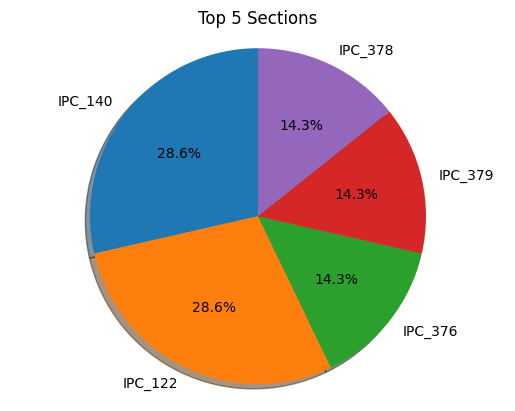

In [ ]:
# prompt: visualize data as different charts and plots

import matplotlib.pyplot as plt

# Pie chart of the top 5 sections
labels = df['Section'].value_counts().index[:5].to_list()
sizes = df['Section'].value_counts().values[:5].tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Top 5 Sections')
plt.show()




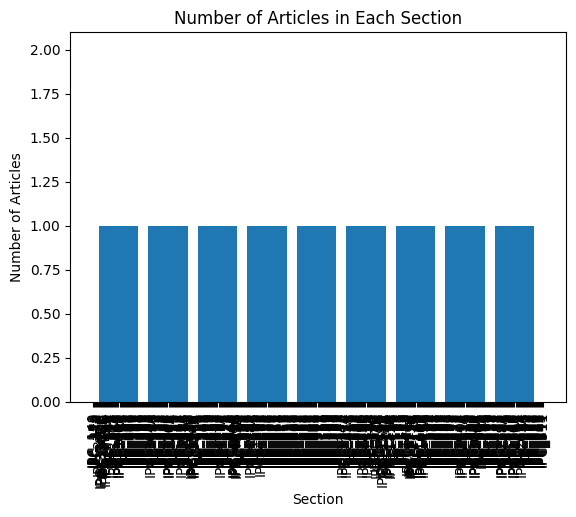

In [ ]:
# Bar chart of the number of articles in each section
sections = df['Section'].value_counts().index.to_list()
counts = df['Section'].value_counts().values.tolist()

fig2, ax2 = plt.subplots()
ax2.bar(sections, counts)
plt.xlabel('Section')
plt.ylabel('Number of Articles')
plt.title('Number of Articles in Each Section')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.show()


In [ ]:

# Drop rows with missing values in the 'Offense' column
df.dropna(subset=['Offense'], inplace=True)

# Separate features (X) and target (y)
X = df['Offense']
y = df['Punishment']

# Vectorize the offense descriptions
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert X_train to a dense matrix
X_train_dense = X_train.toarray()

# Create a DataFrame from the dense matrix
X_train_df = pd.DataFrame(X_train_dense, columns=vectorizer.get_feature_names_out())

# Drop NaN values from the DataFrame
X_train_df.dropna(inplace=True)

# Reconstruct the sparse matrix from the DataFrame
X_train = X_train_df.values


In [ ]:
df.isnull().sum()

Description    0
Offense        0
Punishment     1
Section        0
dtype: int64

In [ ]:
model = RandomForestClassifier()

In [ ]:
nan_indices_y = y_train.isnull()
nan_indices_X = np.isnan(X_train).any(axis=1)

# Find common indices with NaN values in both X_train and y_train
common_nan_indices = np.logical_or(nan_indices_X, nan_indices_y)

# Remove rows with NaN values from both X_train and y_train
X_train = X_train[~common_nan_indices]
y_train = y_train[~common_nan_indices]

# Train the RandomForestClassifier model
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# prompt: print performance metrics scores print as table

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Create a table to display the results
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

# Print the table
print(metrics_table.to_string())


      Metric     Score
0   Accuracy  0.153846
1  Precision  0.110852
2     Recall  0.097500
3   F1 Score  0.091388


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Tune the hyperparameters of the RandomForestClassifier model using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the model with the best hyperparameters
model_best = RandomForestClassifier(**best_params)
model_best.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_best = model_best.predict(X_test)

# Calculate the performance metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

# Create a table to display the results
metrics_table_best = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy_best, precision_best, recall_best, f1_best]
})

# Print the table
print(metrics_table_best.to_string())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, mi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Tune the hyperparameters of the RandomForestClassifier model using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the model with the best hyperparameters
model_best = RandomForestClassifier(**best_params)
model_best.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_best = model_best.predict(X_test)

# Calculate the performance metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

# Create a table to display the results
metrics_table_best = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy_best, precision_best, recall_best, f1_best]
})

# Print the table
print(metrics_table_best.to_string())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, mi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Tune the hyperparameters of the RandomForestClassifier model using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 6, 11],
    'min_samples_split': [3, 6, 11],
    'min_samples_leaf': [2, 3, 5]
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, verbose=2, random_state=42)

# Fit the model to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the model with the best hyperparameters
model_best = RandomForestClassifier(**best_params)
model_best.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_best = model_best.predict(X_test)

# Calculate the performance metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

# Create a table to display the results
metrics_table_best = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy_best, precision_best, recall_best, f1_best]
})

# Print the table
print(metrics_table_best.to_string())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, mi

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
new_offense = input("Enter the information of the offense: ")

# Vectorize the new offense description
new_offense_vectorized = vectorizer.transform([new_offense])

Enter the information of the offense: Wearing the dress or carrying any token used by a soldier, sailor or airman with intent that it may be believed that he is such a soldier, sailor or airman


In [ ]:
new_offense_df = pd.DataFrame({'Offense': [new_offense]})
new_offense_vectorized = vectorizer.transform(new_offense_df['Offense'])
predicted_punishment = model.predict(new_offense_vectorized)[0]

row_index = df[df['Offense'] == new_offense].index[0]
print(f"about crime info\n{df.loc[row_index]}")


about crime info
Description    Description of IPC Section 140\nAccording to s...
Offense        Wearing the dress or carrying any token used b...
Punishment                              3 Months or Fine or Both
Section                                                  IPC_140
Name: 0, dtype: object


In [ ]:
# Predict the punishment for the new offense
predicted_punishment = model.predict(new_offense_vectorized)
print("Predicted punishment:", predicted_punishment)


Predicted punishment: ['3 Months or Fine or Both']
